# itch_ask_bid_midpoint_spread_plot

#### Juan Camilo Henao Londono - 06.02.2019
#### AG Guhr - Universitaet Duisburg-Essen

In the following [link]() can be seen the plot of the function's results

In [1]:
# Modules

from matplotlib import pyplot as plt
import os

import pickle

import itch_data_tools

In [2]:
def itch_ask_bid_midpoint_spread_plot(ticker, year, month, day, t_step):
    """
    Plot the ask, bid, midpoint price and spread data during a open market
    day. The data is loaded from the mipoint price data results.
        :param ticker: string of the abbreviation of the stock to be analized
         (i.e. 'AAPL')
        :param year: string of the year to be analized (i.e '2008')
        :param month: string of the month to be analized (i.e '07')
        :param day: string of the day to be analized (i.e '07')
        :param t_step: time step in the data in ms
    """

    function_name = itch_ask_bid_midpoint_spread_plot.__name__
    itch_data_tools.itch_function_header_print_plot(function_name, ticker,
                                                    ticker, year, month, day,
                                                    t_step)

    # Load data
    ask = pickle.load(open(''.join((
                '../itch_data_{1}/itch_midpoint_data_1ms/itch_midpoint_data'
                + '_ask_{1}{2}{3}_{0}_1ms.pickle').split())
                .format(ticker, year, month, day), 'rb'))
    bid = pickle.load(open(''.join((
                '../itch_data_{1}/itch_midpoint_data_1ms/itch_midpoint_data'
                + '_bid_{1}{2}{3}_{0}_1ms.pickle').split())
                .format(ticker, year, month, day), 'rb'))
    midpoint = pickle.load(open(''.join((
                '../itch_data_{1}/itch_midpoint_data_1ms/itch_midpoint_data'
                + '_midpoint_{1}{2}{3}_{0}_1ms.pickle').split())
                .format(ticker, year, month, day), 'rb'))
    spread = pickle.load(open(''.join((
                '../itch_data_{1}/itch_midpoint_data_1ms/itch_midpoint_data'
                + '_spread_{1}{2}{3}_{0}_1ms.pickle').split())
                .format(ticker, year, month, day), 'rb'))
    time = pickle.load(open(''.join((
                '../itch_data_{}/itch_midpoint_data_1ms/itch_midpoint_data'
                + '_time_1ms.pickle').split())
                .format(year), 'rb'))

    fig = plt.figure(figsize=(9, 16))
    fig.suptitle('{} - {}.{}.{}'.format(ticker, year, month, day), fontsize=16)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95, wspace=0.3)

    plt.subplot(4, 2, 1)
    plt.plot(time[::100] / 1000 / 3600, midpoint[::100], label='Midpoint')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)

    plt.subplot(4, 2, 2)
    plt.plot(time[500::100] / 1000 / 3600, spread[500::100], label='Spread')
    plt.xlabel('Time')
    plt.ylabel('Spread')
    plt.legend(loc='best')
    plt.ylim(0, 0.1)
    plt.grid(True)

    plt.subplot(4, 2, 3)
    plt.plot(time[::100] / 1000 / 3600, bid[::100], label='Bid quotes')
    plt.plot(time[::100] / 1000 / 3600, ask[::100], label='Ask quotes')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)

    plt.subplot(4, 2, 4)
    plt.scatter(time[::100] / 1000 / 3600, ask[::100], marker='.', s=5,
                label='Ask trades')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)

    # Saving data

    if (not os.path.isdir('../itch_plot_{1}/{0}_{2}ms/'
                          .format(function_name, year, t_step))):

        try:

            os.mkdir('../itch_plot_{1}/{0}_{2}ms/'
                     .format(function_name, year, t_step))
            print('Folder to save data created')

        except FileExistsError:

            print('Folder exists. The folder was not created')

    fig.savefig(
            '../itch_plot_{2}/{0}_{4}ms/{0}_{2}{3}_{1}i_{4}ms.png'
            .format(function_name, ticker, year, month, t_step))

    print('Plot saved')
    print()

    return None

ITCH data
itch_ask_bid_midpoint_spread_plot
Processing plot for the stock AAPL the 2016.03.07
Time step: 1ms
Plot saved



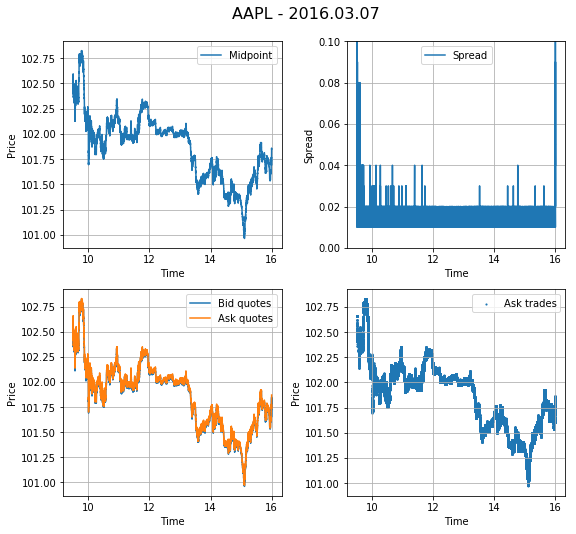

In [3]:
# Test

ticker = 'AAPL'
year = '2016'
month = '03'
days = ['07', '08', '09', '10', '11']
t_step = '1'

itch_ask_bid_midpoint_spread_plot(ticker, year, month, days[0], t_step)